In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10

2021-11-15 21:59:14.870640: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-15 21:59:14.870660: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
(train_images, train_labels),(test_images, test_labels) = cifar10.load_data()
train_images = train_images/255
test_images = test_images/255

In [4]:
train_images.mean(), train_images.std()

(0.4733630004850874, 0.25156892506322026)

In [5]:
train_images = (train_images-np.mean(train_images))/np.std(train_images)
test_images = (test_images-np.mean(test_images))/np.std(test_images)

In [6]:
train_images.mean(),train_images.std()
test_images.mean(),test_images.std()

(4.23122277955675e-15, 1.0000000000000013)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


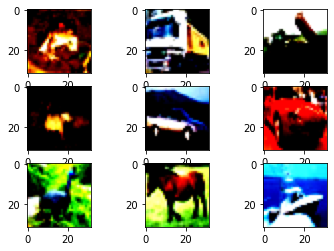

In [7]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_images[i])
plt.show()

In [8]:
model = Sequential([
    Conv2D(32, kernel_size = (3,3), padding = 'same',input_shape = (32,32,3),activation = 'relu'),
    MaxPooling2D((2,2)),
    Dropout(0.2),
    Conv2D(64, kernel_size = (3,3), padding = 'same', activation = 'relu'),
    MaxPooling2D((2,2)),
    Dropout(0.2),
    Conv2D(64, kernel_size = (3,3), padding = 'same', activation = 'relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(60, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

2021-11-15 22:00:23.900730: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-15 22:00:23.900771: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-15 22:00:23.900794: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (howdymodi306-VirtualBox): /proc/driver/nvidia/version does not exist
2021-11-15 22:00:23.901077: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
train_images.shape

(50000, 32, 32, 3)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          3

In [11]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [12]:
history = model.fit(train_images, train_labels,validation_data=(test_images, test_labels), epochs = 10)

2021-11-15 22:00:24.872055: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 614400000 exceeds 10% of free system memory.
2021-11-15 22:00:25.320014: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1563/1563 [==============================] - 97s 61ms/step - loss: 1.4059 - accuracy: 0.4941 - val_loss: 1.0683 - val_accuracy: 0.6242
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0079 - accuracy: 0.6463 - val_loss: 0.9014 - val_accuracy: 0.6886
Epoch 3/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.8686 - accuracy: 0.6983 - val_loss: 0.8274 - val_accuracy: 0.7171
Epoch 4/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.7912 - accuracy: 0.7217 - val_loss: 0.8147 - val_accuracy: 0.7194
Epoch 5/10
1563/1563 [==============================] - 79s 51ms/step - loss: 0.7400 - accuracy: 0.7416 - val_loss: 0.7616 - val_accuracy: 0.7387
Epoch 6/10
1563/1563 [==============================] - 98s 63ms/step - loss: 0.6961 - accuracy: 0.7566 - val_loss: 0.7718 - val_accuracy: 0.7355
Epoch 7/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.6586 - accuracy: 0.7702 - val_loss: 0.7194 -

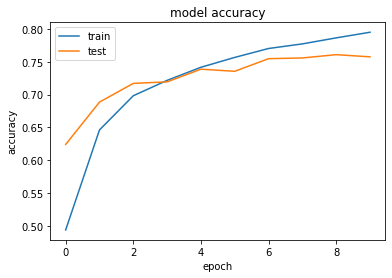

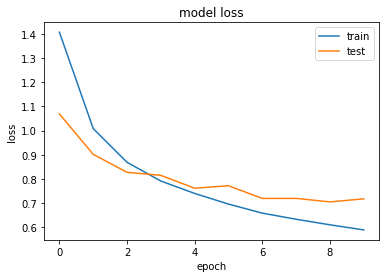

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()